# Assignment 2 - Machine Learning Basics

## *Anna Berman*
Netid:  *aeb100*

Github link: ***Link to the github repo with your completed assignment***

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

1. If the sample is extremely large and the number of predictors is small, a more flexible will likely preform **better** than an inflexible model. The more flexible model will more closely fit the data, and because n is large an p is small we are not very concerned with overfitting the training data.


2. If the sample is small and the number of predictors is extremely large, a more flexible model will likely perform **worse** than an inflexible model. Although the flexible model will more closely fit the data, a flexible model fit on a small n and large p has a high chance of overfitting the training data.


3. If the relationship between predictors and reponse is highly nonlinear, we expect the performance of a flexible statistical learning model to be **better** than an inflexible method. An inflexible method will force the highly nonlinear model into a more linear format. This will result in a high bias an a poor performance compared to a more flexible model that would more accurately explain the non-linear relationship.


4. If the variance of the error tierms is extremely high, we expect the performance of a flexible statistical model to be **worse** than an inflexible method. If the variance of the error terms is extremely high, this may indicate that our model is fitting too tighly to the training data, or in other words, our model is overfitting the data. To reduce this variance and ultimately improve the performace of our model on our test data we need to decrease the flexibiity of our model.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**(ai)** Regression - outcome is CEO salary (continuous)

**(aii)** Inference - What features, or predictors, affect CEO salary?

**(aiii)** n = 500 (US firms), 
p = 3 {profit, number of employees, industry}


**(bi)** Classification - outcome is success or failure (binary)

**(bii)** Prediction - Will a new product be a success or failture?

**(biii)** n = 20 (products), 
p = 13 {price, marketing budget, competition price, 10 other}


**(ci)** Regression - outcome is % change in US dollar (continous)

**(cii)** Prediciton - What will be the % change each week

**(ciii)** n = 52 (stock market data each week in 2012), 
p = 3 {% change in the US market, % change in the British market, % change in the German market}

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

In [10]:
# (a) Write your own kNN classifier
import pandas as pd
import numpy as np
import time

# Load data
X_train_low = pd.read_csv('/Users/annaberman/annaberman/data/A2_X_train_low.csv', header = None)
y_train_low = pd.read_csv('/Users/annaberman/annaberman/data/A2_y_train_low.csv', header = None)
X_test_low = pd.read_csv('/Users/annaberman/annaberman/data/A2_X_test_low.csv', header = None)
y_test_low = pd.read_csv('/Users/annaberman/annaberman/data/A2_y_test_low.csv', header = None)

X_train_high = pd.read_csv('/Users/annaberman/annaberman/data/A2_X_train_high.csv', header = None)
y_train_high = pd.read_csv('/Users/annaberman/annaberman/data/A2_y_train_high.csv', header = None)
X_test_high = pd.read_csv('/Users/annaberman/annaberman/data/A2_X_test_high.csv', header = None)
y_test_high = pd.read_csv('/Users/annaberman/annaberman/data/A2_y_test_high.csv', header = None)


class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.predictors = x
        self.outcomes = y
        pass
    
    def predict(self, x, k):
        # Calculate distances between each predictor and new x
        distances = all_distances(x, self.predictors)

        # Find the k nearest neighbors for each point
        k_nearest = find_k_nearest(distances, k)
        
        # Calculate predictions
        y_hat = [] # Variable to store the estimated class label for 
        for i in distances.index:
            # Loops through every new x, gets the neighbors class, finds mode (y_hat)
            # For every new x get the indexes of the nearest neighbors
            nearest_predictors = k_nearest.iloc[i,:]
            # Match the indexes to the y values of nearest neighbors
            nearest_outcomes = self.outcomes.iloc[nearest_predictors]
            # Calculate the most likely outcome value of neighbors
            majority = nearest_outcomes.mode().iloc[0,0]
            # Append prediction to y_hat
            y_hat.append(majority)
            pass
        
        # Return the estimated targets
        return y_hat

def all_distances(x, predictors):
    # DataFrame to store the distances between each predictor and new point
    # Row indexs = New x index
    # Column indexs = Predictor indexs
    # Ex: distances[0,1] == distance between 1st new x and 2nd predictor
    distances = pd.DataFrame(0, index = np.arange(len(x)), 
                             columns = np.arange(len(predictors))) 
        # Calculate the distance from each vector in x to the training data
    for i in range(len(x)):
        #print('Calculating distance: ', i)
        for j in range(len(predictors)):
            # Loops through every new x and every predictor points
            # Attachs euclidean distance to distance df
            euc_dist = np.linalg.norm(x.iloc[i,:] - np.array(predictors.iloc[j,:]))
           
            # Slower version
            #euc_dist = np.dot(np.subtract(x.iloc[i,:],np.array(predictors.iloc[j,:])),
            #                  np.subtract(x.iloc[i,:],np.array(predictors.iloc[j,:])))
            
            distances.iloc[i,j] = euc_dist
            pass
        pass
    return distances

def find_k_nearest(distances, k):
    # Find the k nearest neighbors for each point
    k_nearest = pd.DataFrame()
    for i in distances.index:
        # Loops through every new x finds the closest predictor points distances
        # Get distances for single new point
        new_x_dist = distances.iloc[i,:] 
        # Sort distances
        new_x_dist = new_x_dist.sort_values() 
        # Get the indexes of nearest neighbors
        k_indexs = pd.Series(new_x_dist.index[:k], index = np.arange(k))
        # Append to df of nearest neighbor indexes
        k_nearest = k_nearest.append(k_indexs, ignore_index = True)
        pass
    return k_nearest


# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [ ]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each

# Run low dimensional model with k = 5
start_time = time.time()
model = Knn()
model.fit(X_train_low, y_train_low)
y_hat = model.predict(X_test_low, 5)
end_time = time.time()
total_time_low = end_time - start_time
print('Total time low-dimensional:', total_time_low)

# Test accuracy of model
y = np.array(y_test_high[0].tolist())
y_hat = np.array(y_hat)
accuracy_low = accuracy(y, y_hat)
print('Accuracy low-dimensional:', accuracy_low)


# Run low dimensional model with k = 5
start_time = time.time()
model = Knn()
model.fit(X_train_high, y_train_high)
y_hat = model.predict(X_test_high, 5)
end_time = time.time()
total_time_high = end_time - start_time
print('Total high-dimensional:', total_time_high)

# Test accuracy of model
y = np.array(y_test_high[0].tolist())
y_hat = np.array(y_hat)
accuracy_high = accuracy(y, y_hat)
print('Accuracy high-dimensional:', accuracy_high)

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Low dimensional comparison to sklearn
start_time = time.time()
model = KNeighborsClassifier(5)
model.fit(X_train_low, np.array(y_train_low).ravel())
y_hat = model.predict(X_test_low)
end_time = time.time()
total_time_low_sklearn = end_time - start_time

print('Total time low-dimensional sklearn:', total_time_low_sklearn)
print('Sklearn is ', round(total_time_low/total_time_low_sklearn,2), 
      'times faster than our classifer for our low dimensional data.',
      'The speed of sklearn is much faster.\n')

y = np.array(y_test_low[0].tolist())
y_hat = np.array(y_hat)
accuracy_low_sklearn = accuracy_score(y, y_hat)
print('Accuracy low-dimensional sklearn:', accuracy_low_sklearn)
print('Sklearn is ', round(accuracy_low/accuracy_low_sklearn,3), 
      'times more accurate than our classifer for our low dimensional data.',
      'The accuracy is relatively the same.\n')

# High dimensional comparison to sklearn
start_time = time.time()
model = KNeighborsClassifier(5)
model.fit(X_train_high, np.array(y_train_high).ravel())
y_hat = model.predict(X_test_high)
end_time = time.time()
total_time_high_sklearn = end_time - start_time

print('Total time high-dimensional sklearn:', total_time_high_sklearn,)
print('Sklearn is ', round(total_time_high/total_time_high_sklearn,2), 
      'times faster than our classifer for our high dimensional data,',
      'The speed of sklearn is much faster.\n')

y = np.array(y_test_high[0].tolist())
y_hat = np.array(y_hat)
accuracy_high_sklearn = accuracy_score(y, y_hat)
print('Accuracy high-dimensional sklearn:', accuracy_high_sklearn)
print('Sklearn is ', round(accuracy_high/accuracy_high_sklearn,3), 
      'times more accurate than our classifer for our high dimensional data.',
      'The accuracy is relatively the same.\n')

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

There are certainly contexts for analysis that require fast predictions such as in financial trading and missile defense. If this was an analysis that needed to be commuted many times a day, or required quick results, the speed of our homemade KNN classifier may not be able to keep up.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

In [11]:
import numpy as np
import pandas as pd

# Observations
X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
# Response
y = np.array(['r','r','r','b','b','r'])

# Test point x1 = x2 = x3
new_x = np.array([0,0,0])

# Euclidean distance
#distances = pd.DataFrame()
distances = []
for obs in X:
    euc_dist = np.linalg.norm(new_x - obs)
    distances.append(euc_dist)
    pass

table = pd.DataFrame({'Euclidean distance from test point':distances, 
                     'Response': y}, index = np.arange(1,7))
table = table.rename_axis('Obs.')
table

,Euclidean distance from test point,Response
Obs.,,
1,3.000000,r
2,2.000000,r
3,3.162278,r
4,2.236068,b
5,1.414214,b
6,1.732051,r


**(b)** What is our prediction with $K=1$? Why?

With $K=1$, our predictions is blue because the first closest point from our test point is observation 5 which is class b. See table below with observations and responses sorted by distances from test point.

In [12]:
# Observations and responses sorted by distances from test point
table.sort_values('Euclidean distance from test point')

,Euclidean distance from test point,Response
Obs.,,
5,1.414214,b
6,1.732051,r
2,2.000000,r
4,2.236068,b
1,3.000000,r
3,3.162278,r


**(c)** What is our prediction with $K=3$? Why?

With $K = 3$ we can see that the $P(blue) = 1/3$ and $P(red) = 2/3$. With $K = 3$, our prediction is that our test point is red because $P(red) > P(blue)$. See table below with three nearest observations and responses. 

In [13]:
# Observations and responses sorted by distances from test point
# Three nearest neighbors
table.sort_values('Euclidean distance from test point').iloc[:3, :]

,Euclidean distance from test point,Response
Obs.,,
5,1.414214,b
6,1.732051,r
2,2.000000,r


**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In general, decreasing $K$ results in a more flexible model. If the Bayes decision boundary is highly nonlinear, we would therefore expect the *best* values of $K$ to be small.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
#import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random

random.seed(133)

# Create synthetic dataset
X, y = make_moons(1000, noise = .35)
df = pd.DataFrame({'x1': X[:,0], 
                   'x2': X[:,1], 
                   'class': y})

**(b)** Scatterplot your random samples with each class in a different color

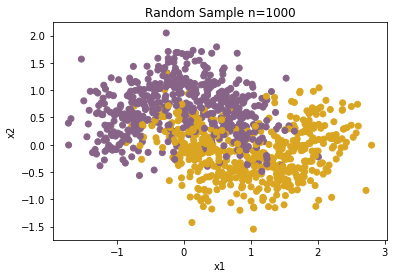

In [15]:
# Create color maps
cmap_light = ListedColormap(['#CECEEE', '#fef65b'])
cmap_bold = ListedColormap(['#876387', '#daa520'])

# Scatterplot
plt.scatter(X[:, 0], X[:,1], c = y, cmap = cmap_bold)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random Sample n=1000')
plt.show()

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

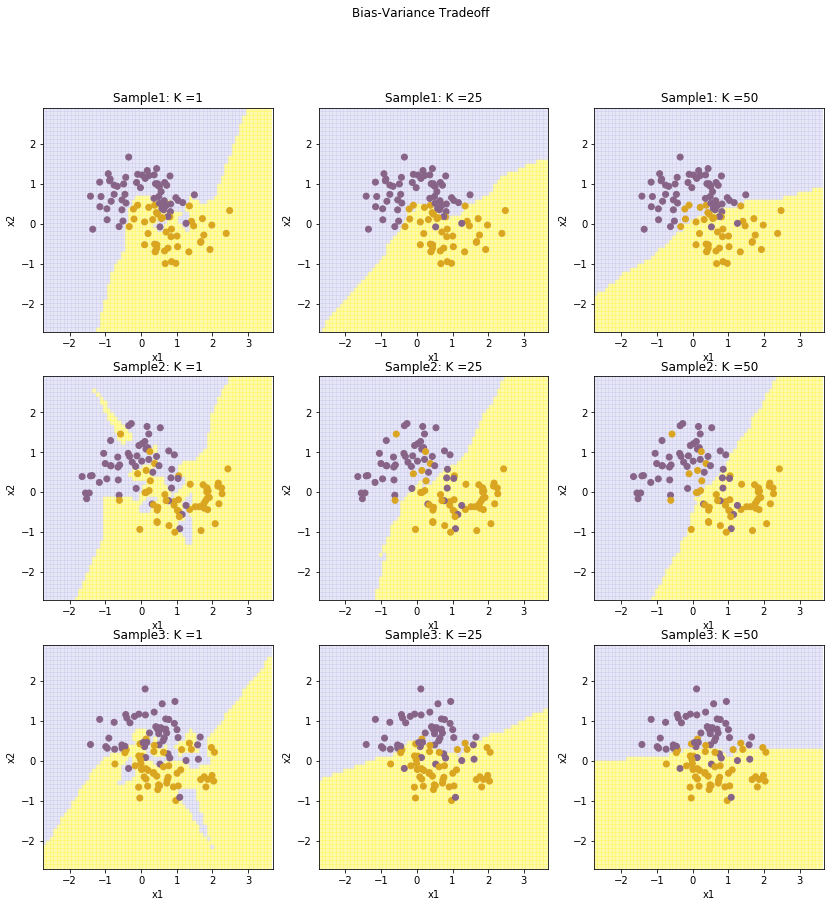

In [9]:
#Plotting decision region
x_min, x_max = df['x1'].min() - 1, df['x1'].max() + 1
y_min, y_max = df['x2'].min() - 1, df['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                     np.arange(y_min, y_max, 0.1))

# Creating subplots
fig, axs = plt.subplots(3, 3)
fig.suptitle('Bias-Variance Tradeoff')
fig.set_figwidth(14)
fig.set_figheight(14)

# Defining Ks
ks = [1,25,50]
for i in range(3):
    # Generate random sample
    sample_index = random.sample(list(df.index), 100)
    sample = df.iloc[sample_index,:]
    
    for k_index, k in enumerate(ks):
        # Fit KNN
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(sample[['x1', 'x2']], sample['class'])
        
        # Make predictions across entire decision region
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot decision regions and original data
        axs[i,k_index].pcolormesh(xx, yy, Z, cmap=cmap_light, alpha = .5)
        axs[i,k_index].scatter(sample['x1'], sample['x2'], c=sample['class'], cmap=cmap_bold)
        axs[i,k_index].set_xlim(x_min, x_max)
        axs[i,k_index].set_ylim(y_min, y_max)
        axs[i,k_index].set_xlabel('x1')
        axs[i,k_index].set_ylabel('x2')
        axs[i,k_index].title.set_text('Sample' + str(i+1) +': K =' + str(k))
        pass
    pass
plt.show()

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

Looking at the decision boundary for $K = 1$, we see there is a great deal of variability between each sample. In fact, each point is perfectly classified. This model appears to be over fitting each sample. This decision boundary variability decreases with $K = 25$, and decreases even further with $K = 50$. 

Additionally, regardless of sample, as $K$ increases we see the decision boundary look more and more like straight line. In other words, the model is becoming less and less flexible as $K$ increases. As a result of this increasing rigidity, as $K$ increases we see an increase in misclassification. 

Given the options of $K = {1, 25, 50}$, the best option appears to be $K = 25$ because this yields a classification model with the best balance of consistency between samples and correct classification (or the best bias-variance tradeoff). 


**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

The bias-variance tradeoff states that, as a general rule, as we use more flexible methods, the variance will increase and the bias will decrease. What we see in our plots illustrates this tradeoff. 

As $K$ decreases, or as the flexibility increases, we see that variability in the model classification increases while bias decreases. With $K = 1$ we see that the decision boundary varies quite a lot between each sample, but that each point is classified perfectly. 

On the other hand, as $K$ increases, or as flexibility decreases, we see that variability decreases while bias increases. With $K = 50$ we see a very consistent boundary between each sample. However, the decision boundary does not seem to do a good job explaining the actually pattern in the data and ultimately misclassifies a good deal of points. 

The best model fit is one that balances variance and bias. In this case, the best choice is $K = 25$ as it shows the best attempt to balance model variance and bias.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

In [16]:
# Create synthetic training dataset
#X, y = make_moons(1000, noise = .35)

# Create synthetic test dataset
X_test, y_test = make_moons(1000, noise = .35)

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

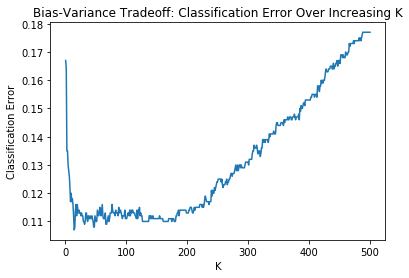

In [24]:
import random
random.seed(250)

# Train Knn Classifiers 
scores = []
for i in range(1,501):
    # Fit a knn model with k = i
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X, y)
    
    # Generate predictions
    accuracy = knn.score(X_test, y_test)
    scores.append(accuracy)
    pass

# Plot error rate    
plt.plot(np.arange(1,501), np.subtract(1,scores))
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.title('Bias-Variance Tradeoff: Classification Error Over Increasing K')
plt.show()

**(c)** What trend do you see in the results?

When $K$ is very small, the classification error is relatively large. As $K$ increases, there is an initial very stark reduction in classification error, however after $K \approx 15$ the classification error begins to slowly increase again and eventually rises rapidly as $K$ continues to increase.

**(d)** What values of $k$ represent high bias and which represent high variance?

The smallest values of $K$ represents the highest variance. In the extreme at $K = 1$, if a prediction's class is determined by the class of it's single nearest neighbor, this model will be highly flexible and also highly variable to small changes in the data. On the flip side, the largest values of $K$ represent the highest bias. When $K = 500$, a prediction's class is determined by half of the entire dataset. This will force a very consistent, but nearly linear decision boundary as we saw in question 6. Forcing this shape on our decision boundary creates a large bias as $K$ continues to increase.!

**(e)** What is the optimal value of $k$ and why?

According to our misclassification rates, the K associated with the best preforming model is the kNN with $K = 15$. Although the exact number will shift with randomization, the optimal $K$ should generally fall around 15.

In [25]:
# Print K for the model with the lowest misclassification
scores = np.array(scores)
print(np.argmax(scores) + 1)

15


**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

In parametric models, the number of parameters often the determines the flexibility of the model. An increasing number of parameters is associated with increased flexibility.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

In [26]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**(a)** Create a scatter plot of your training data.

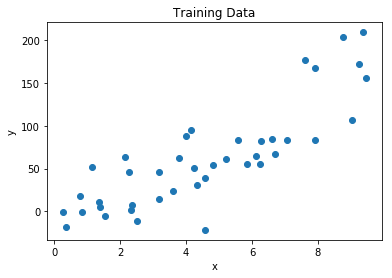

In [201]:
# Training data scatter plot
plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

In [202]:
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score

# Reshape data for LinearRegression
x_train1 = np.array([x_train]).reshape(-1,1)
y_train = np.array([y_train]).reshape(-1,1)

x_test = np.array([x_test]).reshape(-1,1)
y_test = np.array([y_test]).reshape(-1,1)

# Fit linear model
fit1 = LinearRegression().fit(x_train1, y_train1)
print('Linear regression estimation: y =', 
      round(fit1.intercept_[0],2), '+', 
      round(fit1.coef_[0][0],2), 'x')

# R squared and MSE
#r2_1 = r2_score(y_train, pred1)
#mse1 = mean_squared_error(y_train, pred1)
pred1 = fit1.predict(x_train1)
SSReg = np.sum((y_train - pred1) * (y_train - pred1))
SSE = np.sum((y_train - np.mean(y_train)) * (y_train - np.mean(y_train)))

r2_1 = 1- (SSReg / SSE)
mse_1 = SSReg / len(y_train)
print('\nLinear relationship - train data - R-squared:', r2_1)
print('\nLinear relationship - train data - MSE:', mse_1)


Linear regression estimation: y = -21.73 + 18.3 x

Linear relationship - train data - R-squared: 0.7014590913812251

Linear relationship - train data - MSE: 1052.5853662498014


**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

In [203]:
# Creat quadratic x term
x2 = x_train*x_train
x_train2 = np.column_stack((x_train, x2))

# Fit linear model
fit2 = LinearRegression().fit(x_train2, y_train1)
print('Linear regression estimation: y =',
      round(fit2.intercept_[0],2), '+', 
      round(fit2.coef_[0][0],2), 'x +',
      round(fit2.coef_[0][1],2), 'x^2')

# R squared and MSE
#r2_2 = r2_score(y_train, pred2)
#mse_2 = mean_squared_error(y_train, pred2)
pred2 = fit2.predict(x_train2)
SSReg = np.sum((y_train - pred2) * (y_train - pred))
SSE = np.sum((y_train - np.mean(y_train)) * (y_train - np.mean(y_train)))
r2_2 = 1 - (SSReg / SSE)
mse_2 = SSReg / len(y_train)
print('\nNonlinear relationship - train data - R-squared', r2_2)
print('\nNonlinear relationship - train data - MSE:', mse_2)

Linear regression estimation: y = 8.01 + 0.47 x + 1.83 x^2

Nonlinear relationship - train data - R-squared 0.7490480719353505

Nonlinear relationship - train data - MSE: 884.797759660905


**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

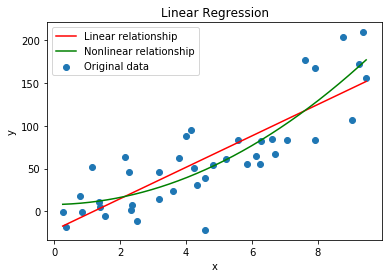

In [193]:
# Create prediction interval
interval = np.arange(min(x_train), max(x_train), step = .01)
interval = np.array([interval]).reshape(-1,1)
interval2 = interval*interval
interval2 = np.column_stack((interval, interval2))

# Generate predicts
y_hat1 = fit1.predict(interval)
y_hat2 = fit2.predict(interval2)

# Plot predictions
plt.scatter(x_train, y_train, label = 'Original data')
plt.plot(interval, y_hat1, 'r', label = 'Linear relationship')
plt.plot(interval, y_hat2, 'g', label = 'Nonlinear relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

In [204]:
# Test data
# Linear relationship
pred3 = fit1.predict(x_test)
r2_3 = r2_score(y_test, pred3)
mse_3 = mean_squared_error(y_test, pred3)
print('Linear relationship - test data - R-squared:', r2_3)
print('Linear relationship - test data - MSE:',mse_3)

# Nonlinear relationship
x_test2 = x_test*x_test
x_test2 = np.column_stack((x_test, x_test2))
pred4 = fit2.predict(x_test2)
r2_4 = r2_score(y_test, pred4)
mse_4 = mean_squared_error(y_test, pred4)
print('\nNonlinear relationship - test data - R-squared:', r2_4)
print('Nonlinear relationship - test data - MSE:',mse_4)

Linear relationship - test data - R-squared: 0.5556465885794163
Linear relationship - test data - MSE: 2023.3121088887128

Nonlinear relationship - test data - R-squared: 0.6927820089560344
Nonlinear relationship - test data - MSE: 1398.8817580143948


**(f)** Which models perform better on the training data, and which on the test data? Why?

For both the training and the test dataset, our model with the nonlinear relationship performed better. From here on out I refer to these models as 'linear' and 'nonlinear' in respect to the relationships they represent, however both models are examples of linear regression.

The performance of the 'nonlinear' model was only slightly better than the performance of the 'linear' model in our training dataset. However, the performance of the 'nonlinear' model using our test dataset was much stronger than that of the 'linear' model. It appears that a purely linear relationship includes too much bias in our model. Our 'linear' model imposing a pattern to the data that does not resemble the true underlying pattern and thus the performance of our 'linear' model deteriorates when applied to the test dataset. Our 'nonlinear' model on the other hand is more flexible and more closely explains the true pattern of the data. Therefore our 'nonlinear' model's performance on our test data is only slightly worse than that on the training data.

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

A model is only as good as the data it's trained on. If the training data is not representative of the test data, any model's predictive performance - no matter the model's sophistication - will significantly deteriorate when applied to data that is significantly different from its training data.